## **5 KEY UNDERSTANDINGS**

### **1.How the coefficients get affected?**

As we increase the value of alpha the coeffients decreases and on further increasing of alpha coefficients tends to apporach to zero but donot become zero. The increase in the value of the alpha increases the value of loss thus penalizing the lareger coefficients thus as the alpha increases the loss reducing tendency of the ridge regerssion reduces the value of the coefficients.

### **2.Higher values are impacted nore**
* If a particluar coefficents is more than it will decrease more than the which are lower. 


### **3.Bias varience tradeoff**
* It balances the bias and varience thus reducing the overfitting with the increasing alpha upto optimal point.

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

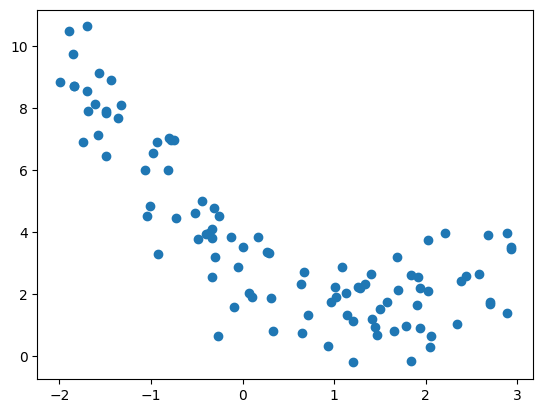

In [22]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)



In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=15)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)


In [25]:
from sklearn.linear_model import Ridge

In [26]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

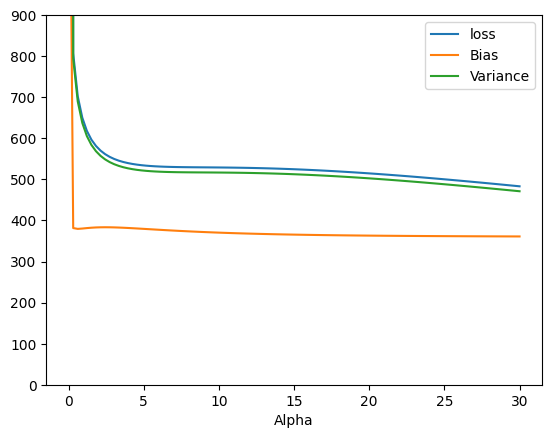

In [31]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.ylim(0,900)
plt.legend()

### **4.Impact on Loss function** 

[27.82809103]
-2.29474455867698


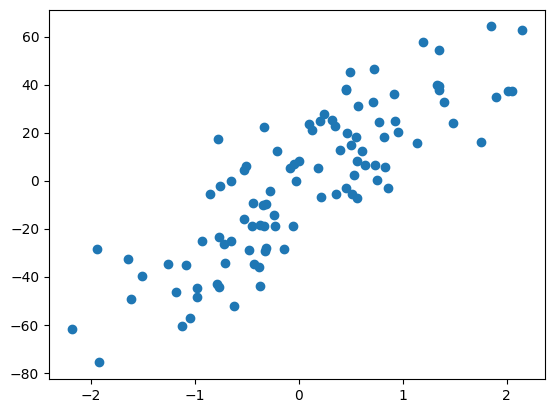

In [32]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [33]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [34]:
def predict(m):
    return m*X - 2.29

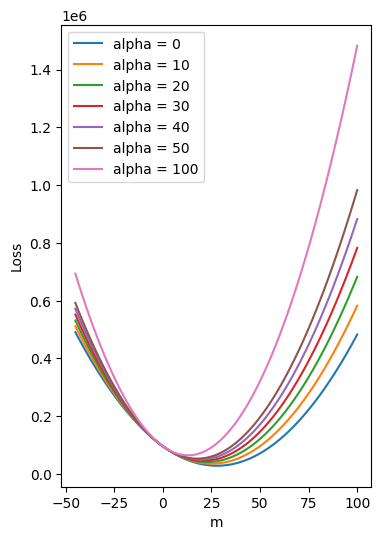

In [36]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

Here as we see that as the value of alpha increaes the vlaue of the coefficients decreases and approaches to zero.


### **5.Why called Ridge?**

![image](1.png)

Here the eliptical plot is the contour plot. Here if we hadnot applied regularization we would see the minimum loss ats its center. Now since we take regularization we see that the minimum loss appears at the ridge or boundary of the circle and the contour plot that is why this is known as ridge regression.